In [1]:
import time 

from K_frac import *
from quantization import *
from tools import *
from multi_factor import *

**Goal.** Simulate trajectories of $X_t = \displaystyle\int_0^t K(t-s)\, dW_s$, for $t \in [0,T]$, with $K(t) = K^\text{frac}(t) = t^{H-\frac12}$.

**Hybrid scheme.** We follow the hybrid discretization scheme introduced in [Bennedsen, Lunde and Pakkanen (2017)](https://arxiv.org/pdf/1507.03004), which is specifically designed to handle Volterra processes with weakly singular kernels by isolating the diagonal singularity.

Let $(t_i)_{i=0,\dots,n}$ be a uniform time grid on $[0,T]$. We decompose the Volterra process $X_{t_i}$ as
\begin{align*}
    X_{t_i} = \sum_{j=0}^{i-1} \int_{t_j}^{t_{j+1}} K(t_i-s)\, dW_s = \sum_{j=0}^{i-2} \int_{t_j}^{t_{j+1}} K(t_i-s)\, dW_s + \underbrace{\int_{t_{i-1}}^{t_{i}} K(t_i-s)\, dW_s}_{\text{singular diagonal term}}
\end{align*}
with the convention that the middle sum is empty when $i=1$. Such kernel satisfy the assumptions in [Bennedsen, Lunde and Pakkanen (2017)](https://arxiv.org/pdf/1507.03004), namely:
- local integrability,
- regular variation near zero,
- square-integrability on compact intervals away from the diagonal.

Under these conditions, the hybrid scheme provides a consistent approximation of the off-diagonal terms. In particular, for $j \le i-2$, the kernel is sufficiently smooth on $[t_j, t_{j+1}]$, and we may approximate
$$\int_{t_j}^{t_{j+1}} K(t_i-s)\, dW_s  \approx K\left(\frac{Tb_{i-j}^*}{n}\right)\int_{t_j}^{t_{j+1}}\, dW_s,$$
with $b_k^* := \left(\frac{k^{H+1/2} - (k-1)^{H+1/2}}{H+1/2}\right)^{\frac{1}{H-1/2}}$, $k\geq 1$. Note that the weights $b_k^*$ are chosen so that the approximation matches the second-order structure of the Volterra process, ensuring optimal mean-square convergence. The singular diagonal term is treated separately, preserving the correct roughness of the paths.


Consequently, performing the change of variables $j = i - k$, we obtain
\begin{align*}
    \sum_{j=0}^{i-2} \int_{t_j}^{t_{j+1}} K(t_i-s)\, dW_s &\approx \sum_{j=0}^{i-2} K\left(\frac{Tb_{i-j}^*}{n}\right)\int_{t_j}^{t_{j+1}}\, dW_s= \sum_{k=2}^i K\left(\frac{Tb_k^*}{n}\right)\int_{t_{i-k}}^{t_{i-k+1}}\, dW_s = \sum_{k=2}^i K\left(\frac{Tb_k^*}{n}\right)\overline{W}_{i-k},
\end{align*}
where we define the Brownian increments $\overline{W}_i := W_{t_{i+1}} - W_{t_i}$, $i = 0,\ldots,n-1$. We also introduce the sequence $(\widetilde{W}_i)_{i=0,\ldots,n-1}$, defined by
$$\widetilde{W}_i := \int_{t_i}^{t_{i+1}} K(t_{i+1}-s)\, dW_s.$$
By standard properties of Wiener integrals, for each $i = 0,\ldots,n-1,$ the pair $(\overline{W}_i, \widetilde{W}_i)$ forms a centered two-dimensional Gaussian vector with covariance matrix

\begin{align*}
    \Sigma &= \begin{pmatrix}
        \Sigma_{00} & \Sigma_{01} \\
        \Sigma_{10} & \Sigma_{11} 
    \end{pmatrix},\\
    \text{where} \,\,\Sigma_{00} = \frac{T}{n}, \quad \Sigma_{10} =\Sigma_{01} &= \int_{t_i}^{t_{i+1}} K(t_{i+1}-s)\, ds = \dfrac{T^{H+1/2}}{(H+1/2)n^{H+1/2}},\\
    \Sigma_{11} &= \int_{t_i}^{t_{i+1}} K(t_{i+1}-s)^2\, ds = \dfrac{T^{2H}}{2Hn^{2H}}.
\end{align*}

Putting everything together, for all $i = 1,\ldots,n$, the Volterra process admits the approximation
\begin{align*}
    X_{t_i} &= \sum_{k=2}^i K\left(\dfrac{Tb_k^*}{n}\right)\overline{W}_{i-k} + \widetilde{W}_{i-1}. 
\end{align*}

**Multifactor approximation.** We now introduce a multi-factor approximation of the fractional kernel. The idea is to approximate the fractional kernel by a finite sum of exponentials:
\begin{align*}
    K^{\text{frac}}(t) \approx \widetilde{K}^{\text{frac}}(t) = \sum_{j=1}^{n_{\text{fact}}} \alpha_j e^{-\gamma_j t}, \qquad (\alpha_j)_{j=1,\ldots, n_{\text{fact}}},\, (\gamma_j)_{j=1,\ldots, n_{\text{fact}}} \in \mathbb{R}_+^{n_{\text{fact}}}.
\end{align*}

<div style="border:solid 1px; border-radius:8px; padding: 6px 8px 6px 8px; margin-top: 12px; border-color:rgb(0, 62, 92, 0.5); background-color:rgb(251, 251, 251);"> 
    <strong>Remark.</strong> This approximation is justified by the fact that fractional kernel is completely monotone on $(0,\infty)$.
Recall that a function $K : (0,\infty) \longmapsto \mathbb{R}$ is said to be completely monotone if
$$(-1)^k K^{(k)}(t) \ge 0,
\qquad \forall t > 0,\; \forall k \ge 0.$$
By Bernstein’s theorem, complete monotonicity is equivalent to the existence of a positive measure $\mu$ on $\mathbb{R}_+$ such that
$$K(t) = \int_0^\infty e^{-x t}\, \mu(dx).$$
</div>   

Using this approximation, the Volterra process $X$ can be written as
$$X_t \approx \sum_{j=1}^{n_{\mathrm{fact}}} \alpha_j X_t^{(j)},
\qquad
X_t^{(j)} := \int_0^t e^{-\gamma_j (t-s)}\, dW_s.$$
For each $j \in \{1,\ldots,n_{\mathrm{fact}}\}$, the process $(X_t^{(j)})_{t \ge 0}$ is an Ornstein–Uhlenbeck process (hence a semimartingale), satisfying
$$dX_t^{(j)} = -\gamma_j X_t^{(j)}\, dt + dW_t,
\qquad
X_0^{(j)} = 0.$$

**Exact simulation.** In addition to the hybrid and multi-factor approximations, the Volterra process $X$ admits a closed-form covariance structure, which in principle allows for exact Gaussian simulation: 
\begin{align*}
\Sigma(s,u)
&= \mathbb{E}[X_s X_u]
= \int_0^{s \wedge u} (s-z)^{H-\frac12}(u-z)^{H-\frac12}\, dz = \frac{1}{H+\frac12}\,
\frac{s^{H+\frac12}}{u^{\frac12-H}}\,
{}_2F_1\!\left(
1,\; \frac12-H;\; H+\frac32;\; \frac{s}{u}
\right),
\end{align*}
where ${}_2F_1$ denotes the Gauss hypergeometric function.

In [2]:
T = 0.1
n = 700
M = 25000
rho = -0.3

### I. Hybrid scheme

#### I.1. $H = 0.1$

In [7]:
H = 0.1

In [13]:
start = time.time() 
b_star = compute_b_star(n, H)
W_vals  = compute_B(M, n, T, H, rho)
c_array_full = compute_c_array(n, T, H, b_star) 
X = simulate_X_frac(M, n, T, c_array_full, W_vals)
print("Time : ", time.time() - start) 

Time :  1.52443528175354


In [14]:
start = time.time() 
Z = W_vals[:, :, 0] * np.sqrt(n/T) 
X_exact = simulate_X_frac_exact(M, n, T, H, Z)
print("Time : ", time.time() - start) 

Time :  1.4635801315307617


#### I.2. $H = 0.4$

In [18]:
H = 0.4 

In [20]:
start = time.time()
b_star = compute_b_star(n, H)
W_vals  = compute_B(M, n, T, H, rho)
c_array_full = compute_c_array(n, T, H, b_star) 
X_ = simulate_X_frac(M, n, T, c_array_full, W_vals)
print("Time : ", time.time() - start) 

Time :  1.5685102939605713


In [21]:
start = time.time() 
Z = W_vals[:, :, 0] * np.sqrt(n/T) 
X_exact_ = simulate_X_frac_exact(M, n, T, H, Z)
print("Time : ", time.time() - start) 

Time :  1.5972249507904053


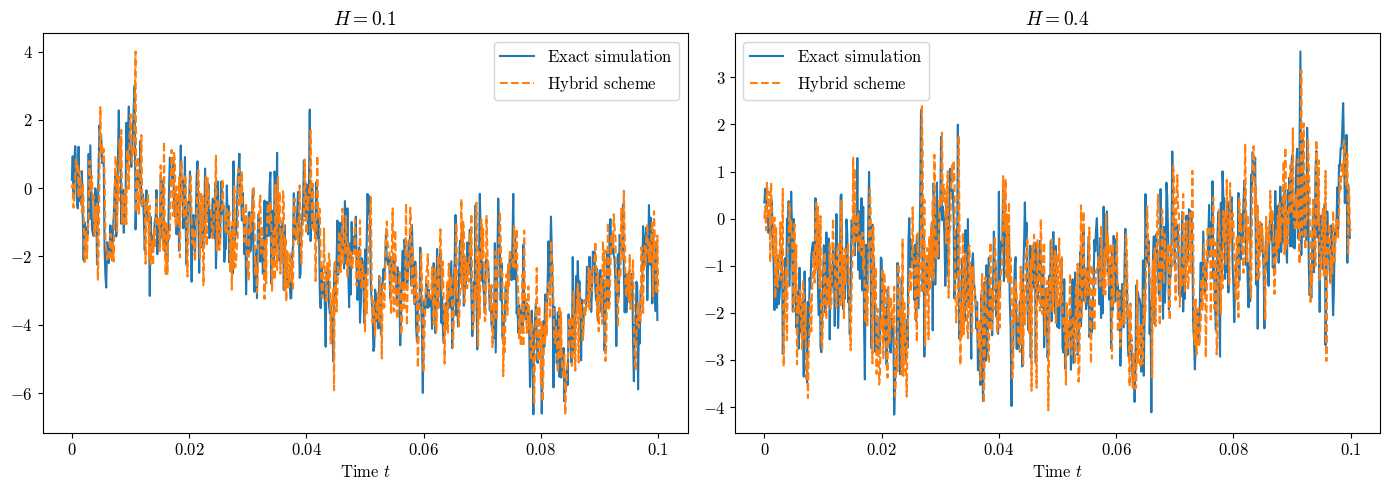

In [69]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))

t_grid = np.linspace(0,T, n+1)

m_test = 0

ax[0].plot(t_grid[:-1], X_exact[m_test,:], label =r"$\text{Exact simulation}$")
ax[0].plot(t_grid, X[m_test,:], linestyle ="--", label =r"$\text{Hybrid scheme}$")

ax[1].plot(t_grid[:-1], X_exact_[m_test,:], label =r"$\text{Exact simulation}$")
ax[1].plot(t_grid, X_[m_test,:], linestyle ="--", label =r"$\text{Hybrid scheme}$")
ax[0].set_title(fr"$H = 0.1$", fontsize=14)
ax[1].set_title(fr"$H = 0.4$", fontsize=14)

for i in range(2) : 
    ax[i].set_xlabel(r"$\text{Time }t$", fontsize=12)
    ax[i].tick_params(axis='both', labelsize=12)
    ax[i].xaxis.set_major_formatter(lambda x, _: f"${x:g}$")
    ax[i].yaxis.set_major_formatter(lambda y, _: f"${y:g}$")
    ax[i].legend(fontsize=12)

plt.tight_layout()
plt.show()

### II. Multi-factor approximation

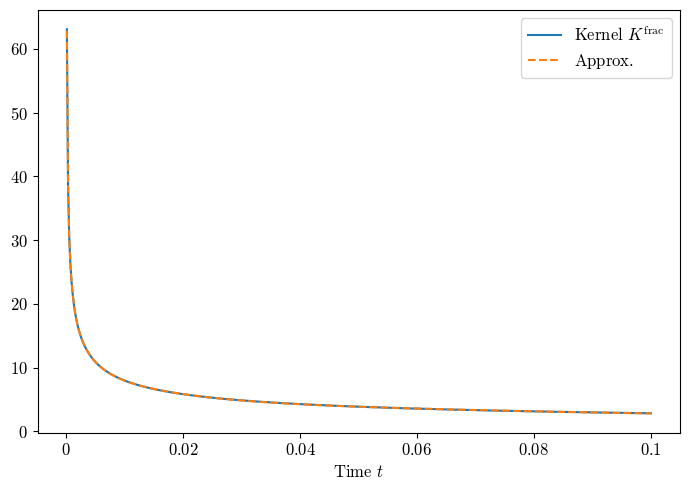

In [7]:
n_factors = 10
T = 0.1
H = 0.05
t, y, alpha_i, gamma_i = fit_K_frac(n_factors, H, T, display=True)

In [6]:
M = 10000
n = 600
T = 0.1
n_factors = 15
rho = -0.5
N_vals = np.random.normal(0.0, 1.0, size = (M, n, 2))
t_grid = np.linspace(0, T, n+1)

#### II.1. $H=0.1$

In [39]:
H = 0.1

In [41]:
start = time.time() 
b_star = compute_b_star(n, H) 
W_vals = compute_B(M, n, T, H, rho, N_vals) 
c_array = compute_c_array(n, T, H, b_star) 
X_hybrid_01 = simulate_X_frac(M, n, T, c_array, W_vals)
print("Time : ", time.time() - start) 

Time :  0.3519461154937744


In [43]:
start = time.time() 
Z = N_vals[:, :, 0]
X_exact_01 = simulate_X_frac_exact(M, n, T, H, Z)
print("Time : ", time.time() - start) 

Time :  4.873115062713623


In [45]:
start = time.time() 
t, _, alpha_i, gamma_i = fit_K_frac(n_factors, H, T, n, False, False)
X_01 = simulate_X_multifactor(M, n, n_factors, T, alpha_i, gamma_i, Z) 
print("Time : ", time.time() - start) 

Time :  0.763329029083252


#### II.2. $H=0.4$

In [20]:
H = 0.4

In [22]:
start = time.time() 
b_star = compute_b_star(n, H) 
W_vals = compute_B(M, n, T, H, rho, N_vals) 
c_array = compute_c_array(n, T, H, b_star) 
X_hybrid_04 = simulate_X_frac(M, n, T, c_array, W_vals)
print("Time : ", time.time() - start) 

Time :  0.30643200874328613


In [28]:
start = time.time() 
Z = N_vals[:, :, 0]
X_exact_04 = simulate_X_frac_exact(M, n, T, H, Z)
print("Time : ", time.time() - start) 

Time :  4.997616767883301


In [30]:
start = time.time() 
t, _, alpha_i, gamma_i = fit_K_frac(n_factors, H, T, n, False, False)
X_04 = simulate_X_multifactor(M, n, n_factors, T, alpha_i, gamma_i, Z) 
print("Time : ", time.time() - start) 

Time :  0.5279538631439209


#### II.3 Joint plot 

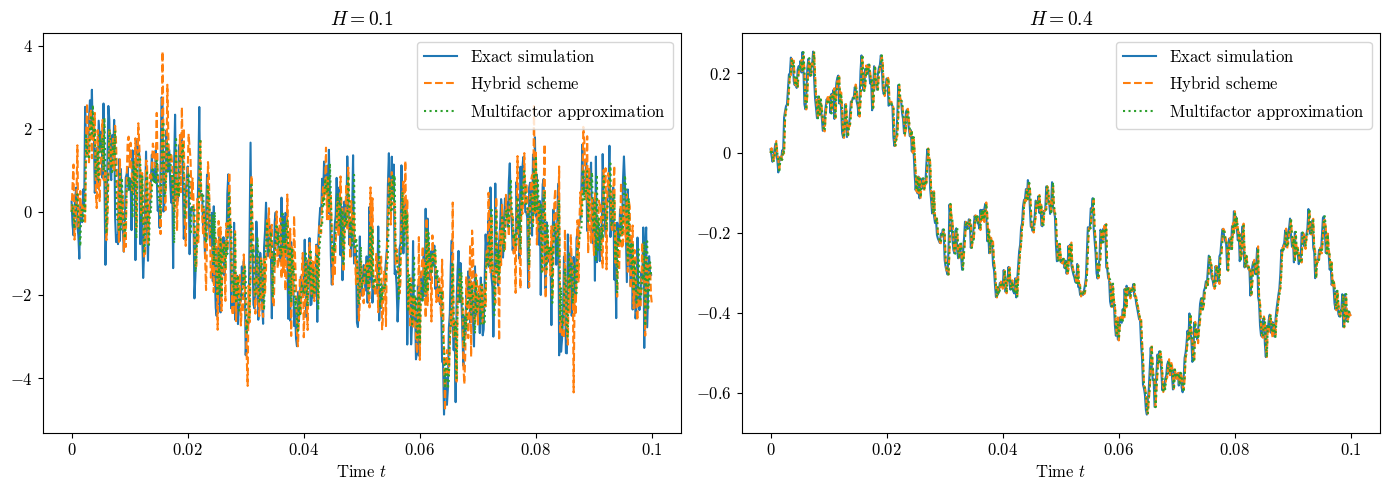

In [49]:
fig, ax = plt.subplots(1, 2, figsize=(14,5))

t_grid = np.linspace(0,T, n+1)

m_test = 0

ax[0].plot(t_grid[:-1], X_exact_01[m_test,:], label =r"$\text{Exact simulation}$")
ax[0].plot(t_grid, X_hybrid_01[m_test,:], linestyle ="--", label =r"$\text{Hybrid scheme}$")
ax[0].plot(t_grid, X_01[m_test,:], linestyle =":", label =r"$\text{Multifactor approximation}$")

ax[1].plot(t_grid[:-1], X_exact_04[m_test,:], label =r"$\text{Exact simulation}$")
ax[1].plot(t_grid, X_hybrid_04[m_test,:], linestyle ="--", label =r"$\text{Hybrid scheme}$")
ax[1].plot(t_grid, X_04[m_test,:], linestyle =":", label =r"$\text{Multifactor approximation}$")


ax[0].set_title(fr"$H = 0.1$", fontsize=14)
ax[1].set_title(fr"$H = 0.4$", fontsize=14)

for i in range(2) : 
    ax[i].set_xlabel(r"$\text{Time }t$", fontsize=12)
    ax[i].tick_params(axis='both', labelsize=12)
    ax[i].xaxis.set_major_formatter(lambda x, _: f"${x:g}$")
    ax[i].yaxis.set_major_formatter(lambda y, _: f"${y:g}$")
    ax[i].legend(loc="upper right", fontsize=12)

plt.tight_layout()
plt.show()